<a href="https://colab.research.google.com/github/Sharma-Pranav/DeepLearning/blob/master/Autoencoder_Example_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import datasets
from keras.layers import Input, Dense
from keras.models import Model

In [0]:
data = datasets.load_digits()

X_data = data.images
y_data = data.target

In [0]:
X_data = X_data.reshape(X_data.shape[0], 64)

In [0]:
X_data = X_data / 16.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

In [0]:
dim_reduced = 10
inputs = Input(shape = (X_train.shape[1],))
dense_layer = Dense(dim_reduced, activation = 'relu')(inputs)
outputs = Dense(X_train.shape[1], activation = 'softmax') (dense_layer)

In [0]:
auto_encoder = Model(inputs = inputs, outputs = outputs)

In [0]:
encoder = Model(inputs = inputs, outputs = dense_layer)


In [0]:
decoder_input = Input(shape = (dim_reduced,))
decoder_output = auto_encoder.layers[-1]
decoder = Model(inputs = decoder_input, outputs = decoder_output(decoder_input))

In [0]:
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')


In [30]:
auto_encoder.fit(X_train, X_train, epochs = 1000, batch_size = 50, validation_data = (X_test, X_test))

Train on 1257 samples, validate on 540 samples
Epoch 1/1000
1257/1257 [==============================] - 0s 217us/step - loss: 1.2674 - val_loss: 1.2437
Epoch 2/1000
1257/1257 [==============================] - 0s 36us/step - loss: 1.2210 - val_loss: 1.2009
Epoch 3/1000
1257/1257 [==============================] - 0s 36us/step - loss: 1.1812 - val_loss: 1.1686
Epoch 4/1000
1257/1257 [==============================] - 0s 36us/step - loss: 1.1559 - val_loss: 1.1521
Epoch 5/1000
1257/1257 [==============================] - 0s 36us/step - loss: 1.1433 - val_loss: 1.1435
Epoch 6/1000
1257/1257 [==============================] - 0s 38us/step - loss: 1.1359 - val_loss: 1.1381
Epoch 7/1000
1257/1257 [==============================] - 0s 39us/step - loss: 1.1308 - val_loss: 1.1338
Epoch 8/1000
1257/1257 [==============================] - 0s 36us/step - loss: 1.1264 - val_loss: 1.1297
Epoch 9/1000
1257/1257 [==============================] - 0s 42us/step - loss: 1.1224 - val_loss: 1.1258
Epoch 1

In [0]:
encoded = encoder.predict(X_test)
decoded = decoder.predict(encoded)

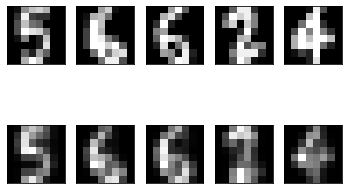

In [32]:
n = 5
for i in range(n):
    # visualizing test data instances
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(8,8))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # visualizing encode-decoded test data instances
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded[i].reshape(8,8))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()